In [1]:
#%pip install git+https://github.com/amazon-science/chronos-forecasting.git
#%pip install ipympl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

In [2]:
df = pd.read_csv('data/load.csv', parse_dates=['datetime'])
# Fit to range
#df = df.loc[df['load_MW'] < 10000].loc[df['load_MW'] > 2000]
#df['load_MW'] = df['load_MW'].bfill()

df.head()

,datetime,load_MW
0,2024-09-11 13:00:00+02:00,6856
1,2024-09-11 12:00:00+02:00,7224
2,2024-09-11 11:00:00+02:00,7859
3,2024-09-11 10:00:00+02:00,7093
4,2024-09-11 09:00:00+02:00,7429


In [3]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

In [35]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["load_MW"])
prediction_length = 50
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

In [36]:
# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

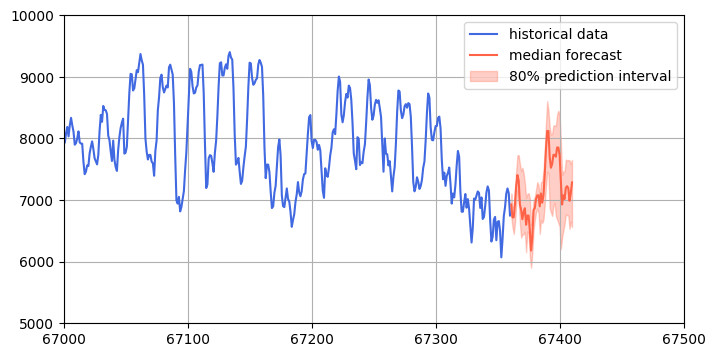

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(df["load_MW"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.ion()
plt.xlim(67000, 67500)
plt.ylim(5000, 10000)
plt.show()